In [56]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [57]:
## Reading the database
# '../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'
data_telco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## First 5 rows
data_telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **DATA EXPLORATION**

In [58]:
## object type of each feature
data_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Where we can see that the SeniorCitizen, Tenure and MonthlyCharges columns are of numeric type (int, float), while the others are of type 'object'. The TotalCharges column type should be 'float', however it is being read as 'object'; later in this notebook we will make the necessary corrections.

On the other hand, the previous table shows us that there are no null values in any of the columns of the database, since the non-null count is equal to the number of records.

* #### **Churn Distribution**

Text(0.5, 1.0, '% Customer Churn')

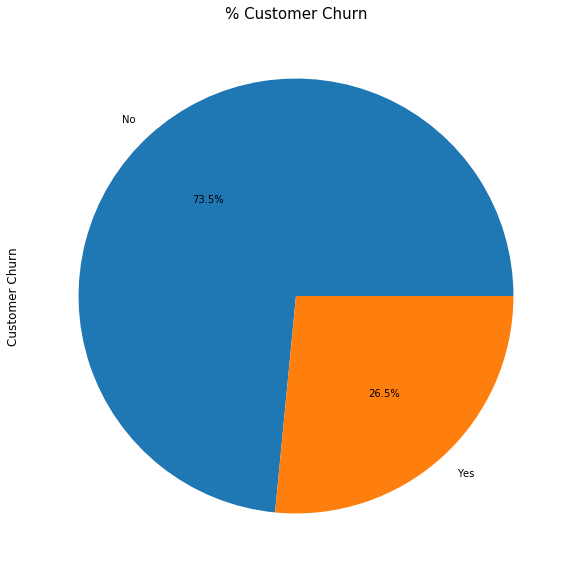

In [59]:
## Distribution of data in the output column
ax = (data_telco.Churn.value_counts()*100/len(data_telco)).plot.pie(autopct='%.1f%%', figsize=(20,10))

ax.set_ylabel('Customer Churn', fontsize=12)
ax.set_title('% Customer Churn', fontsize=15)

About 27% of users abandoned the service in the last month (1,869), while the rest remained (5,174).

* #### **Gender Distribution**

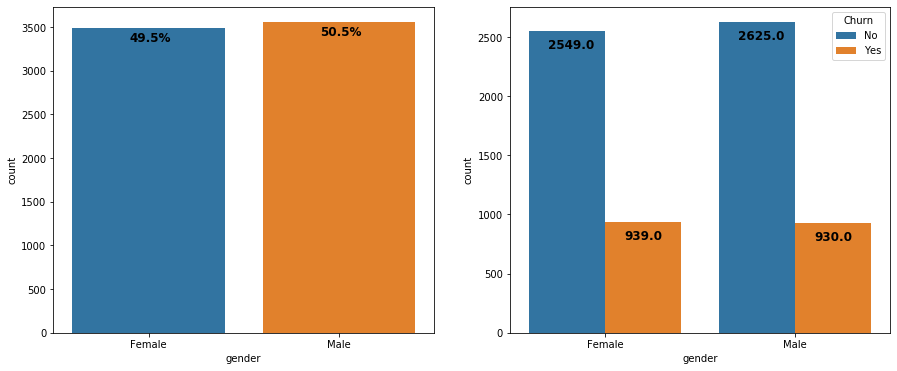

In [60]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

## Distribution of data in the gender column
ax1 = sns.countplot(x='gender', data=data_telco, ax=axes1)

total = len(data_telco['gender'])
for p in ax1.patches:
     ax1.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.3, p.get_height()-150),
                  weight = 'bold',
                  size = 12)
        
## Distribution of data in the gender column
ax2 = sns.countplot(x='gender', data=data_telco, hue='Churn', ax=axes2)

for p in ax2.patches:
     ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()-150),
                  weight = 'bold',
                 size = 12)
        
plt.show()


The number of users belonging to each sex is approximately similar in our database. This distribution may give indications that considering the sex of the client is not relevant when analyzing abandonment and that in subsequent analyzes it can be ruled out.

* #### **Senior Citizen Distribution**

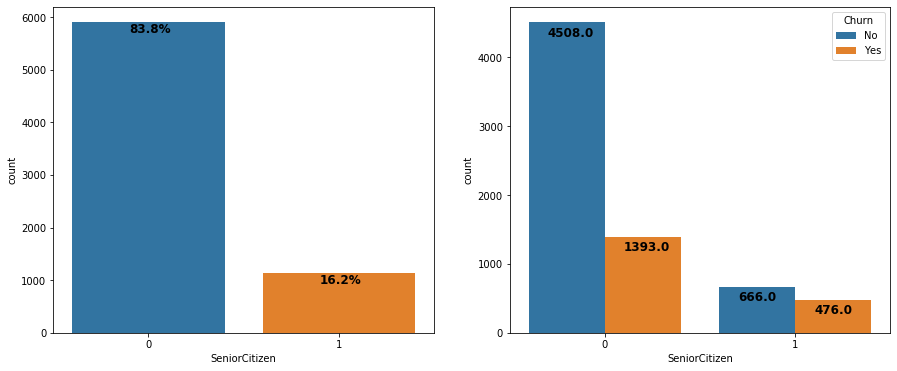

In [61]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

## Distribution of data in the Senior Citizen column
ax1 = sns.countplot(x='SeniorCitizen', data=data_telco, ax=axes1)

total = len(data_telco['SeniorCitizen'])
for p in ax1.patches:
     ax1.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.3, p.get_height()-200), 
                weight = 'bold',
                 size = 12)


## Churn between Senior and NonSenior users
ax2 = sns.countplot(x='SeniorCitizen', hue='Churn', data=data_telco, ax=axes2)

for p in ax2.patches:
     ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()-200), weight = 'bold', size = 12)
        
plt.show()

More than 80% of the users present in the database are Non Senior Citizens; Among these, around 24% left the service in the last month. While about 42% of Senior Citizens canceled the service (almost double that of Non Senior Citizens).

* #### **Partner Distribution**

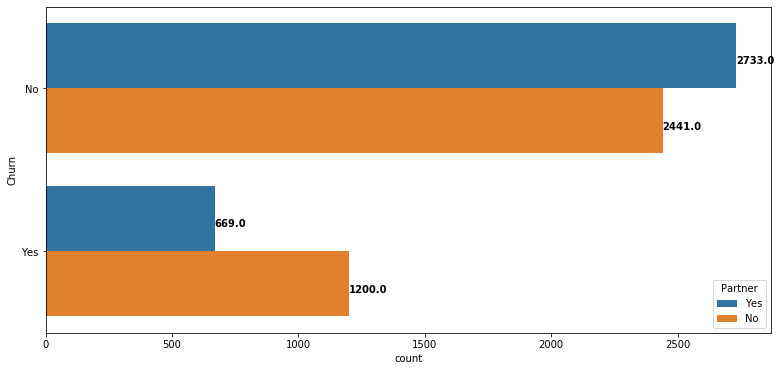

In [62]:
## Partner Column Distribution

plt.figure(figsize=(13,6))
ax=sns.countplot(y='Churn', hue='Partner', data=data_telco)

for p in ax.patches:
     ax.annotate('{:.1f}'.format(p.get_width()), (p.get_x()+p.get_width(), p.get_y()+p.get_height()-0.15), weight = 'bold')
        
plt.show()       

Among the Users who still continue with the service, around half live with a partner, while double of  the users who left the service during the last month live alone.

* #### **Dependents Distribution**

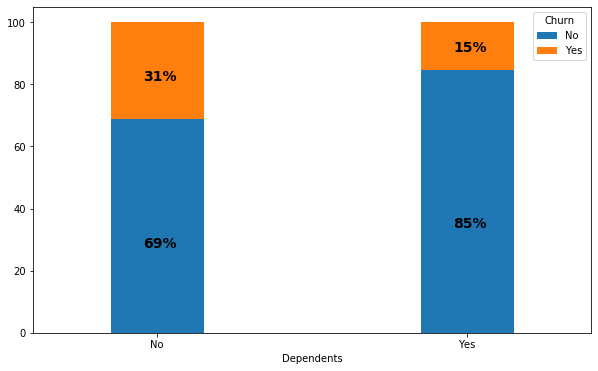

In [63]:
## Churn rate according to Partner distribution
dependent_churn = data_telco.groupby(['Dependents','Churn']).size().unstack()

ax = (dependent_churn.T*100/ dependent_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.35*width, p.get_y()+.4*height),
               weight = 'bold',
               size = 14)                                                                

Approximately 31% of users who do not have dependents left the service in the last month, while only 15% of users who left the service have dependents (50% less).

* #### **Contract Distribution**

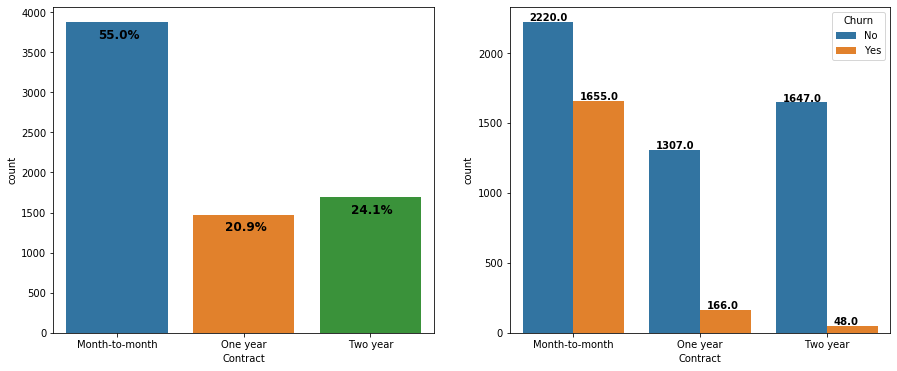

In [64]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

## Distribución de los datos en la columna Contract
ax1 = sns.countplot(x='Contract', data=data_telco, ax=axes1)

total = len(data_telco['Contract'])
for p in ax1.patches:
     ax1.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.25, p.get_height()-200), 
                weight = 'bold',
                 size = 12)

## Comportamiento del abandono entre los Usuarios dependiendo del tipo de contrato
ax2 = sns.countplot(x='Contract', hue='Churn', data=data_telco, ax=axes2)

for p in ax2.patches:
     ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+10), 
                  weight = 'bold')
        
plt.show()

More than half (55%) of the users present in the database had a type of contract "month by month". In addition, around 89% of the Users who abandoned the service during the last month had a type of "month-to-month" contract, 9% a one-year contract and 2% a two-year contract.

* #### **Payment Method Distribution**

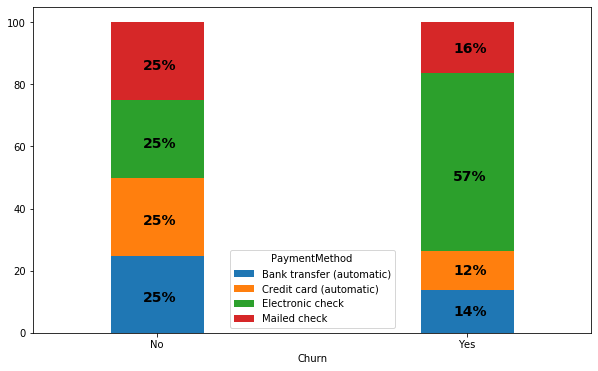

In [65]:
##Churn rate according to Payment Method Distribution

payment_churn = data_telco.groupby(['Churn', 'PaymentMethod']).size().unstack()

ax = (payment_churn.T*100/ payment_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.35*width, p.get_y()+.4*height),
               weight = 'bold',
               size = 14)      


The number of users with the Electronick Check payment method is slightly higher than the Users with other payment methods. The abandonment among users with this method was much higher (57%) compared to those with other methods. While the users who remain in the service are equally distributed among the four payment methods.

* #### **Tenure Distribution**

Text(0, 0.5, 'Number of Users')

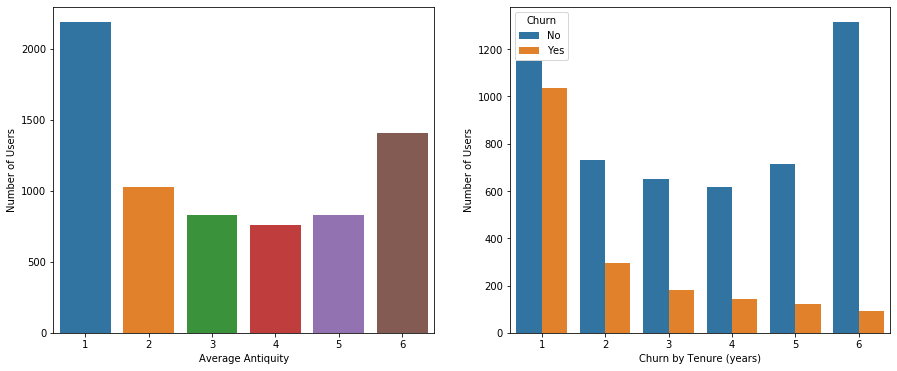

In [66]:
# Let's group the data in the Tenure column
bins = [-1, 12, 24, 36, 48, 60, 73]
labels = ['1', '2', '3', '4', '5', '6']
data_telco['tenureGroup'] = pd.cut(data_telco["tenure"], bins, labels=labels)

# Antiguedad usuarios
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))
sns.countplot(x='tenureGroup', data=data_telco, ax=axes1)
axes1.set_xlabel('Average Antiquity')
axes1.set_ylabel('Number of Users')


# Churn during the last month
sns.countplot(x='tenureGroup', hue='Churn', data=data_telco, ax=axes2)
axes2.set_xlabel('Churn by Tenure (years)')
axes2.set_ylabel('Number of Users')

Most users of the database have been with the service for one year or less, followed by Users with more than 5 years. As the number of years of subscription of the Users increases, the lower the rate of abandonment.

* #### *MonthlyCharges Distribution*

Text(0.5, 1.0, 'Distribution of Monthly Charges')

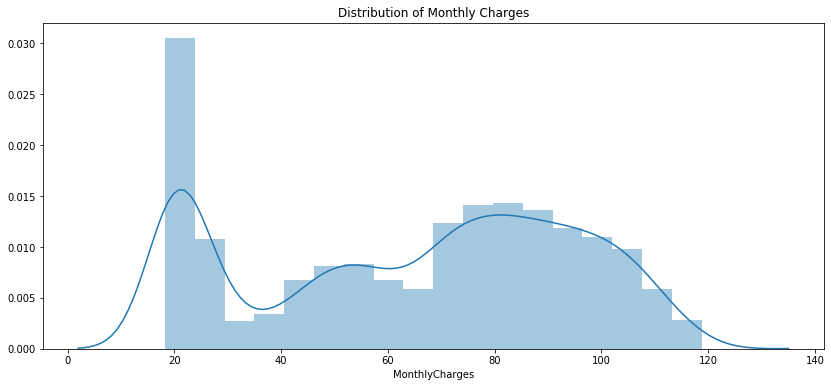

In [67]:
# # MonthlyCharges histogram
plt.figure(figsize=(14,6))
ax = sns.distplot(data_telco.MonthlyCharges)
ax.set_title('Distribution of Monthly Charges')

A large number of users have relatively low monthly charges (USD 18.15 - 28.3); among these, the abandonment rate (9%) is low compared to the abandonment rate of Users with higher monthly charges (37% on average for users with monthly charges between USD 78.55 and USD 108.7 USD). The churn rate for users with the highest monthly charges (> 108.7) was only 15%.

* #### *TotalCharges Distribution*

The TotalCharges column has some rows filled with (" "): that's why it is being read as object type. Let's replace those rows assuming that TotalCharges equals Tenure times MonthltCharges.

In [68]:
##  Replacing missing values in TotalCharges Column
data_telco['TotalCharges'] = data_telco['TotalCharges'].replace(" ", (data_telco.MonthlyCharges * data_telco.tenure))

## We convert the column to numeric type
data_telco['TotalCharges'] = pd.to_numeric(data_telco['TotalCharges'])

Text(0.5, 1.0, 'Distribution of Monthly Charges')

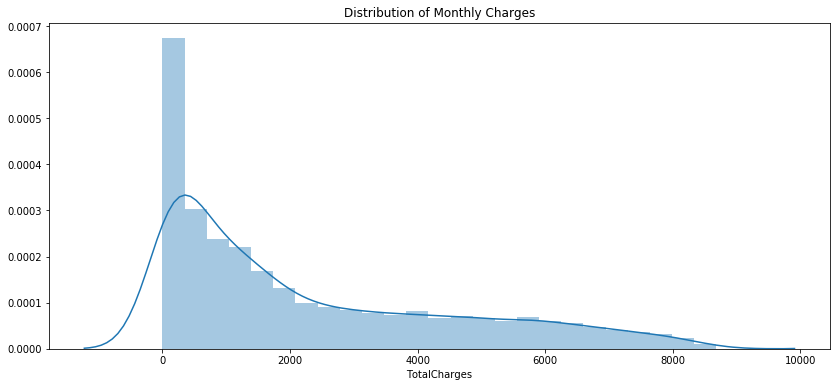

In [69]:
## TotalCharges histogram
plt.figure(figsize=(14,6))
ax = sns.distplot(data_telco.TotalCharges)
ax.set_title('Distribution of Monthly Charges')

* #### *Correlations with quantitative variables*

(3, 0)

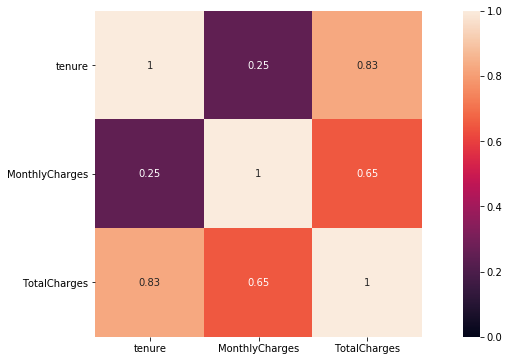

In [70]:
# Correlation
data_corr = data_telco[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

#Heatmap
fig, axes = plt.subplots(figsize=(15,6))
sns.heatmap(data=data_corr, annot=True, ax=axes, square=True,linewidths=0, vmin=0, vmax=1)

[items.set_rotation(0) for items in axes.get_yticklabels()]
axes.set_ylim([3, 0])

Based on the correlation matrix calculated between the continuous quantitative variables Tenure, MonthlyCharges and TotalCharges, it is observed that the monthly charge has no linear relationship with the MonthlyCharges variable, while if it does with the TotalCharges variable, the latter makes sense, I understand it. that the longer the stay, the greater the monthly amount has accumulated. On the other hand, all the existing relationships are positive. To achieve a better visualization, these correlations will be plotted on a heat map, taking a null correlation as the minimum value and a unit correlation as the maximum value.

### **DATABASE TRANSFORMATION**

In [71]:
## current database
data_telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenureGroup
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,3
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,4
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [72]:
# We remove the columns 'customerID', 'gender', 'TotalCharges'
data_telco = data_telco.drop(['customerID', 'gender', 'TotalCharges', 'tenureGroup'], axis=1)

In [73]:
# dtypes
data_telco.dtypes

SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
Churn                object
dtype: object

We create the data_cat database in which we convert all the 'object' type variables from the data base to 'category' type variables.

In [74]:
## Object to categorical
data_cat = data_telco.astype({'Partner':'category', 'Dependents':'category', 'PhoneService':'category', 'MultipleLines':'category',
       'InternetService':'category', 'OnlineSecurity':'category', 'OnlineBackup':'category', 'DeviceProtection':'category',
       'TechSupport':'category', 'StreamingTV':'category', 'StreamingMovies':'category', 'Contract':'category',
       'PaperlessBilling':'category', 'PaymentMethod':'category', 'Churn':'category'})

In [75]:
# dtypes
data_cat.dtypes

SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
Churn               category
dtype: object

Let's take the column vector

In [76]:
## Columns
cat_columns = data_cat.select_dtypes(['category']).columns
print(cat_columns)

Index(['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


We apply the function "cat.codes" on the columns of class "category" in our database to assign a numerical value to the levels of each attribute or variable.

In [77]:
## CCategorical to numerical
data_cat[cat_columns]= data_cat[cat_columns].apply(lambda x: x.cat.codes)

In [78]:
## Current database
data_cat.head(10)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1
5,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,1
6,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,0
7,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,0
8,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,1
9,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,0


### **CUSTOMER SEGMENTATION USING K-MEANS**

Clustering will be applied using the *K-Means* algorithm on the **data_cat** database to segment users, later, the behavior of the variables within each group will be analyzed, with respect to abandonment.

* ##### Splitting the database

In [79]:
## separating the target and features

data_feat = data_cat.drop(['Churn'], axis=1)
target = data_cat.loc[:, ['Churn']]
columnas = data_feat.columns 

In [80]:
## features
data_feat.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70


We proceed to normalize the features matrix

In [81]:
from sklearn import preprocessing

data_norm = preprocessing.normalize(data_feat, norm='l2', axis=0)

data_feat = pd.DataFrame(data_norm, columns=columnas)
data_feat.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0.0,0.017145,0.0,0.000293,0.000000,0.008921,0.000000,0.00000,0.018863,0.000000,0.000000,0.0,0.0,0.000000,0.015484,0.012527,0.004981
1,0.0,0.000000,0.0,0.009971,0.012538,0.000000,0.000000,0.02041,0.000000,0.018886,0.000000,0.0,0.0,0.011008,0.000000,0.018790,0.009503
2,0.0,0.000000,0.0,0.000587,0.012538,0.000000,0.000000,0.02041,0.018863,0.000000,0.000000,0.0,0.0,0.000000,0.015484,0.018790,0.008986
3,0.0,0.000000,0.0,0.013197,0.000000,0.008921,0.000000,0.02041,0.000000,0.018886,0.020305,0.0,0.0,0.011008,0.000000,0.000000,0.007058
4,0.0,0.000000,0.0,0.000587,0.012538,0.000000,0.010426,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.015484,0.012527,0.011797


We determine the 'optimal' number of clusters into which we should divide the database through the elbow graph, which seeks to explain the percentage of variance based on the number of clusters. At the end, the point is chosen where it is considered that adding another cluster does not reduce the variation.

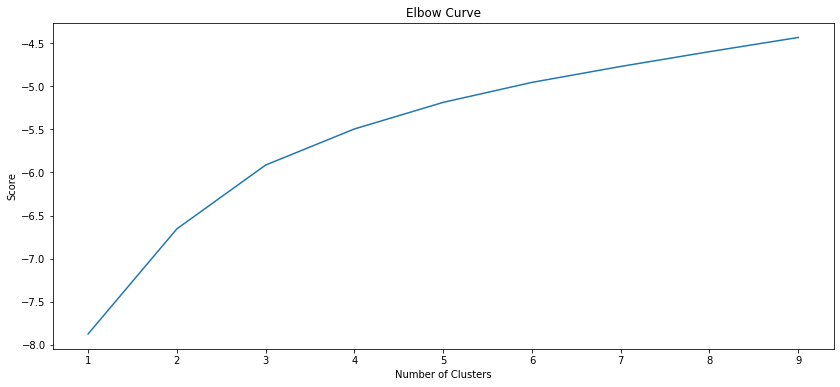

In [82]:
from sklearn.cluster import KMeans

## K value

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(data_feat).score(data_feat) for i in range(len(kmeans))]
score

plt.figure(figsize=(14, 6))
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

We take *K = 4* and apply K-Means on the database:

In [83]:
#Fix the seed
np.random.seed(7552)

# k=4
kmeans = KMeans(n_clusters=4).fit(data_feat)
centroids = kmeans.cluster_centers_
print(centroids)

[[1.20060970e-03 1.09559061e-02 4.84499786e-03 1.71526660e-02
  1.12964045e-02 1.20717577e-02 7.63889321e-03 1.33044393e-02
  1.29823045e-02 1.42606019e-02 1.43866264e-02 1.30928438e-02
  1.32540340e-02 1.72339129e-02 9.23859419e-03 6.67829533e-03
  1.30935486e-02]
 [2.95914978e-02 8.22823134e-03 1.54483782e-03 9.09430905e-03
  1.13909690e-02 1.10280820e-02 8.67349874e-03 4.63090581e-03
  7.81990909e-03 7.45934367e-03 4.17092682e-03 9.08937437e-03
  9.33727808e-03 3.53559938e-03 1.19418189e-02 9.59112298e-03
  1.31519816e-02]
 [2.74953671e-16 2.98610829e-03 6.50690551e-04 4.69506279e-03
  1.12289148e-02 6.02726832e-03 8.87532755e-03 5.43395690e-03
  5.87812163e-03 5.53699754e-03 5.42086517e-03 6.47715336e-03
  6.55690653e-03 2.01061994e-03 9.25604865e-03 1.17642318e-02
  9.77668228e-03]
 [5.59738294e-05 1.45395829e-02 2.16876590e-02 9.86669835e-03
  1.14710067e-02 6.75524799e-03 1.13197295e-02 9.33004994e-03
  8.92002940e-03 8.35956442e-03 8.65451776e-03 8.32758500e-03
  7.97768865e-03

In [84]:
## Groups obtained

groups = kmeans.labels_
print(groups.shape)

(7043,)


In [85]:
## ..to Pandas
groups = pd.DataFrame(data = groups, columns=['labels'])
print(groups.shape)

(7043, 1)


Add column with the groups obtained to the base:

In [86]:
## Database + groups

data_cat['labels'] = groups.values
data_cat.head(10)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,labels
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0,2
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0,2
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1,2
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1,2
5,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,1,2
6,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,0,3
7,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,0,2
8,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,1,0
9,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,0,3


* *Number of Users assigned to each group*

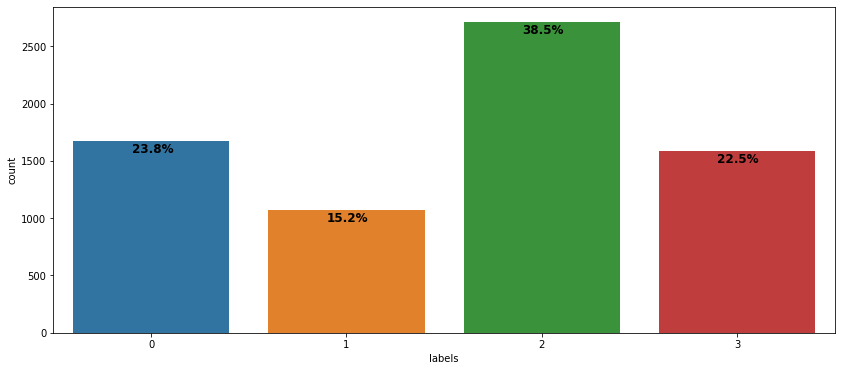

In [87]:
## Customer distribution among the four groups

plt.figure(figsize = (14,6))
ax1 = sns.countplot(x = 'labels', data = data_cat)

total = len(data_cat['labels'])
for p in ax1.patches:
     ax1.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.3, p.get_height()-100), 
                weight = 'bold',
                 size = 12)


Approximately 28% of clients were grouped in cluster 1, 25% were within cluster 0, 16% were grouped in cluster 3 and finally, about 31% of users were assigned to cluster 3.

* *Churn distribution among the groups:*

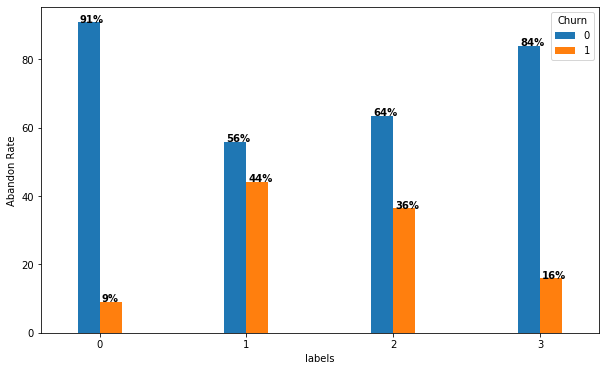

In [88]:
## Churn
labels_churn = data_cat.groupby(['labels', 'Churn']).size().unstack()

ax = (labels_churn.T*100/ labels_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = False,
                                                                rot = 0, 
                                                                figsize = (10,6))
ax.set_ylabel('Abandon Rate')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.1*width, p.get_y()+height),
               weight = 'bold')
                  

Observations:
- In cluster 0, 9% of users abandoned the service, in cluster 1 44%, in cluster 2 36% Users abandoned the service, while in cluster 3 it was 16% of users.
    

### *Behavior of the variables according to the group*

* #### *Contact*

Distribution of the type of contract of the users belonging to each cluster, where:
- 0 = Monthly contract
- 1 = One-year contract
- 2 = Two-year contract

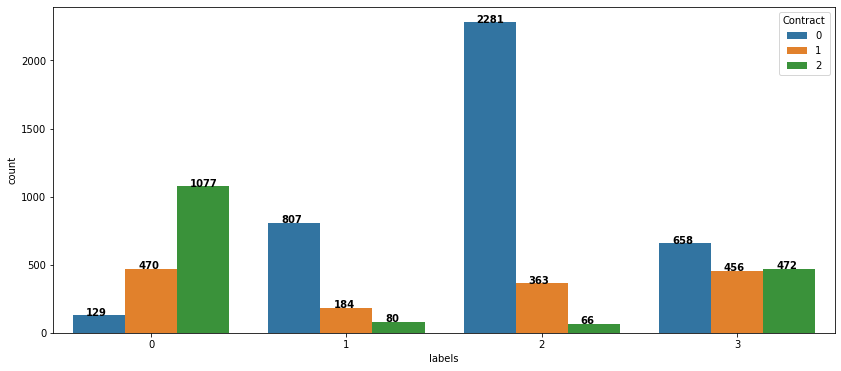

In [89]:
## Contract distribution

plt.figure(figsize=(14,6))
ax = sns.countplot(x='labels', hue='Contract', data=data_cat)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}'.format(height), (p.get_x()+.25*width, p.get_y()+height),
               weight = 'bold')



Observations:

- For groups 1 and 2, the predominant type of contract is month by month, followed by the one-year contract, and finally the two-year contract. 

- Groups 0 and 3 presented lower user abandonment rates. In this pair of groups, the number of users with a two-year contract type was higher, followed by the one-year contract and the month-to-month contract.

- The probability of User abandonment increases for those groups where the type of month-to-month contract is the predominant one. This is consistent with what was observed in the exploratory analysis.

* #### *Payment method*

Let's graph the behavior of the payment method used by users according to the cluster in which they were grouped.

- 0 = Bank transfer (automatic)
- 1 = Credit card (automatic)
- 2 = Electronic check
- 3 = Mailed check

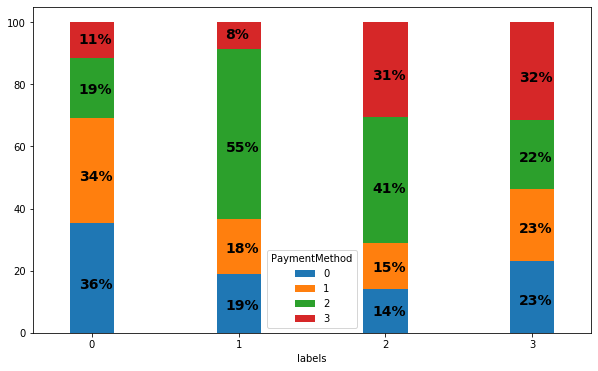

In [90]:
##  payment method by group

payment_label = data_cat.groupby(['labels', 'PaymentMethod']).size().unstack()

ax = (payment_label.T*100/ payment_label.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.2*width, p.get_y()+.4*height),
               weight = 'bold',
               size = 14)     

Observations:

- In group 0, users who pay using method 0 prevail, followed by user with payment method 1. 
- In group 1, users who pay using method 2 prevail. This behavior is somewhat similar in group 2.
- In group 2, users who pay using method 3 prevail.
- Groups where payment method 2 is relevant, have the highest churn rates.

### **CLASSIFICATION USING LOGISTIC REGRESSION AND RANDOM FOREST**

Let's import the required libraries:

In [93]:
## methods
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

We separate the column with the groups of the features set, we also eliminate the Churn column and partition the database:

In [94]:
# features and target
data_feat2 = data_cat.drop(['Churn', 'labels'], axis=1)
target2 = data_cat.loc[:, ['labels']]

# fix the seed
np.random.seed(752332)

## splitting the data set
X_train, X_test, y_train, y_test = train_test_split(data_feat2, target2, test_size = 0.2, random_state=0)

Now we proceed to scale the training and test data using StandardScaler ()

In [96]:
# scaler
scaler = StandardScaler()

# fit the scaler
X_train_std = scaler.fit_transform(X_train)

# test set
X_test_std = scaler.transform(X_test)

Logistic Regression and Random forest:

In [97]:
# Logistic Regression 

lr = LogisticRegression()
lr.fit(X_train_std, y_train)


# Random forest
rf = RandomForestClassifier()
rf.fit(X_train_std, y_train)

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\ipyk

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Prediction: 

In [98]:
# Logistic Regression 
lr_pred = lr.predict(X_test_std)

# Random forest
rf_pred = rf.predict(X_test_std)

Let's proceed to measure the performance metrics:

In [99]:
##Precision

lr_score = precision_score(y_test, lr_pred, average='micro')
rf_score = precision_score(y_test, rf_pred, average='micro')

print("Precision of {0:.1%} obtained with Logistic Regression".format(lr_score))
print("Precision of {0:.1%} obtained with Random forest\n".format(rf_score))

##Recall
lr_score = recall_score(y_test, lr_pred, average='micro')
rf_score = recall_score(y_test, rf_pred, average='micro')

print("Recall of {0:.1%} obtained with Logistic Regression".format(lr_score))
print("Recall of {0:.1%} obtained with Random forest".format(rf_score))

Precision of 98.2% obtained with Logistic Regression
Precision of 96.9% obtained with Random forest

Recall of 98.2% obtained with Logistic Regression
Recall of 96.9% obtained with Random forest


In [101]:
## Confusion matrix

lr_cf = confusion_matrix(y_test, lr_pred)
print("Logistic Regression confusion matrix:\n", lr_cf, "\n")

rf_cf = confusion_matrix(y_test,  rf_pred)
print("Random forest confusion matrix:\n", rf_cf, "\n")

Logistic Regression confusion matrix:
 [[318   3   0   6]
 [  1 213   0   0]
 [  0   0 535  12]
 [  3   0   0 318]] 

Random forest confusion matrix:
 [[312   3   6   6]
 [  2 212   0   0]
 [ 14   0 531   2]
 [  7   0   4 310]] 



Observations:

- High performance is obtained with both models for classifying users within the four groups as shown by the metrics used.
- The Logistic Regression model showed slightly better performance, but the performance of both models is very good.
- It is not necessary to adjust the models in this case, since, by default, both showed a good performance.

#### **FEATURE IMPORTANCES**

* ##### **Logistic Regression**

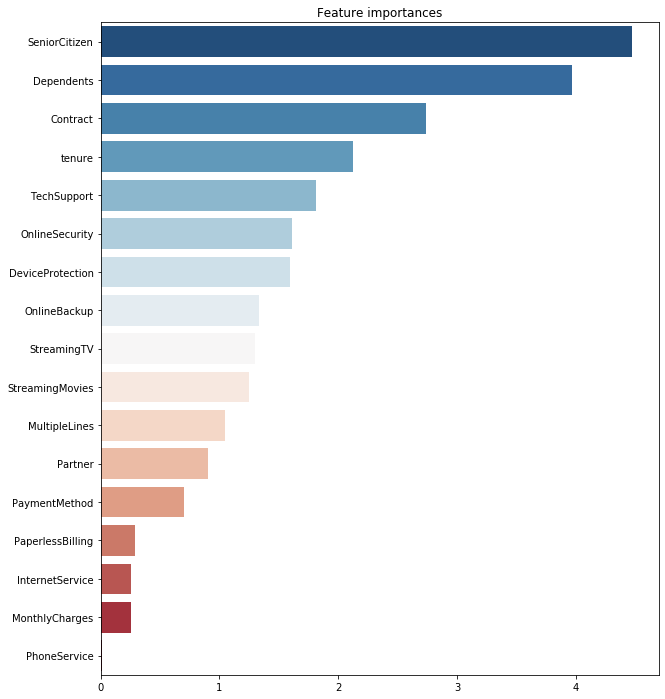

In [102]:
# feature importances
imp = pd.Series(data=abs(lr.coef_[0]), index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importances")
ax = sns.barplot(y=imp.index, x=imp.values, palette="RdBu_r", orient='h')

* ##### **Random Forest**

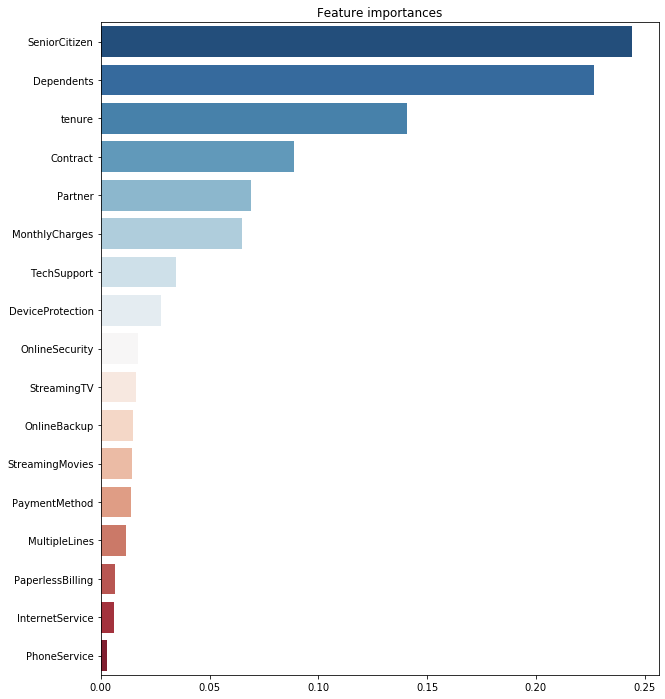

In [104]:
# feature importances

imp = pd.Series(data=rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importances")
ax = sns.barplot(y=imp.index, x=imp.values, palette="RdBu_r", orient='h')

With both models we obtain that the variables "SeniorCitizens" and "Dependents" are the most relevant when classifying users within the four groups.